# Урок 7. Классификация с помощью KNN. Кластеризация K-means

### Подготовим модель из урока

In [1]:
# подключим необходимые библиотеки

import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

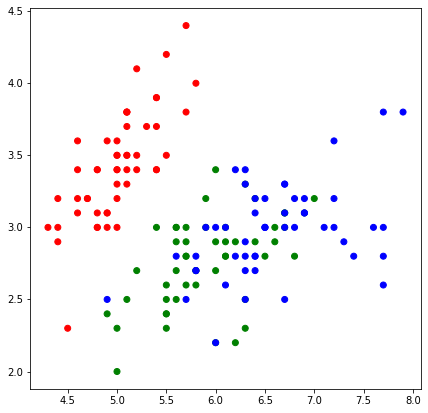

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

# Отобразим данные
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [3]:
# Вспомогательные функции


# Евклилова метрика
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)


# Алгоритм KNN
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers


# Вычисление точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))


# Отображение графиков
def get_graph(X_train, y_train, k, q, w):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q, w)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [4]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Выполним сразу два задания, в одном модифицируя строку с подсчетом частоты встречающихся классов, добавив в множители веса. При вызове функции по умолчанию будет считаться как обычная функция подсчета, если будем вызывать с весами q и w от 0 до 1, то это и будут наши коэффициенты. 

- q - коэффициент для порядковго номера;
- w - коэффициент для расстояния.

In [5]:
# Алгоритм KNN
def knn(x_train, y_train, x_test, k, q, w):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))

        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1 * (q**i) * (w**d[0])
            i += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
k = 5
q = 1
w = 1
y_pred = knn(X_train, y_train, X_test, k, q, w)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


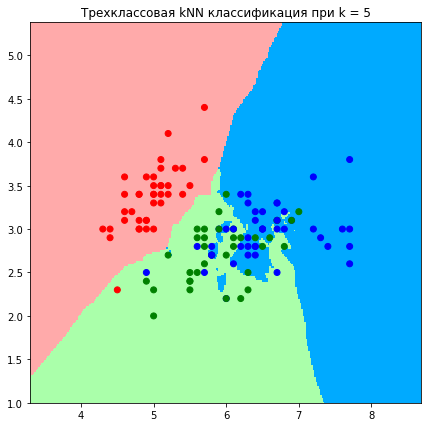

In [7]:
get_graph(X_train, y_train, 5, 1, 1)

In [8]:
k = 5
q = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]
w = 1
for i in q:
    y_pred = knn(X_train, y_train, X_test, k, i, w)
    print(f'Точность алгоритма при q = {i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при q = 0.01: 0.667
Точность алгоритма при q = 0.05: 0.667
Точность алгоритма при q = 0.1: 0.667
Точность алгоритма при q = 0.2: 0.667
Точность алгоритма при q = 0.3: 0.667
Точность алгоритма при q = 0.4: 0.667
Точность алгоритма при q = 0.5: 0.667
Точность алгоритма при q = 0.6: 0.733
Точность алгоритма при q = 0.7: 0.733
Точность алгоритма при q = 0.9: 0.867


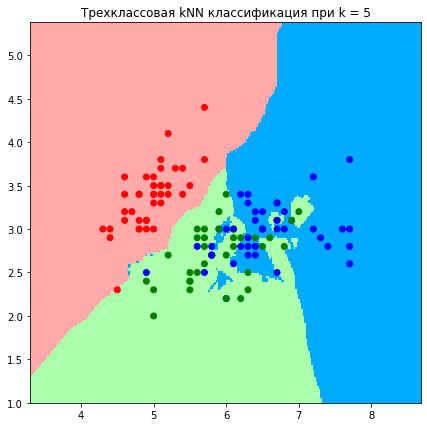

In [9]:
get_graph(X_train, y_train, 5, 0.7, 1)

In [10]:
k = 5
q = 1
w = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]
for i in w:
    y_pred = knn(X_train, y_train, X_test, k, q, i)
    print(f'Точность алгоритма при w = {i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при w = 0.01: 0.833
Точность алгоритма при w = 0.05: 0.867
Точность алгоритма при w = 0.1: 0.867
Точность алгоритма при w = 0.2: 0.867
Точность алгоритма при w = 0.3: 0.867
Точность алгоритма при w = 0.4: 0.867
Точность алгоритма при w = 0.5: 0.867
Точность алгоритма при w = 0.6: 0.867
Точность алгоритма при w = 0.7: 0.867
Точность алгоритма при w = 0.9: 0.867


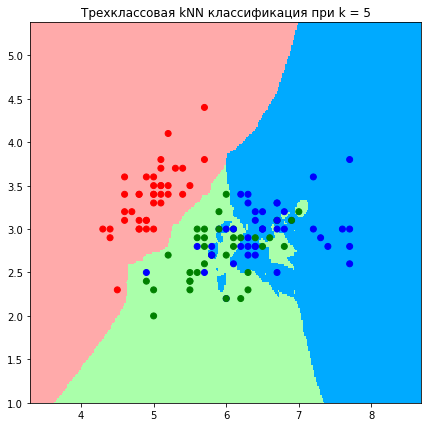

In [11]:
get_graph(X_train, y_train, 5, 1, 0.01)

Как видно из результатов, большое влияние имеет именно параметр числа соседей k. Добавление весов на улучшение метрики сильно влияет, порой даже наоборот. 

Например веса, рассчитанные на базе порядкового номера при значениях близких к 0 ухудшают метрику, а при значении близких к 1, наоборот улучшают.

Аналогичная ситуация с весами на базе расстояния до соседа, но алгоритм выдает более стабильные результаты. Если коэффициент брать совсем маленький, например 0.01, то тогда влияние заметно. В остальном, алгоритм ведет себя как обычный при k=5.

Разделяляющие гиперплоскости будут иметь отличия в случае разных показателей метрик. Чем хуже метрика, тем больше будет артефактов на гиперплоскости, как и показано в реализации. Если же брать гиперпароаметры такие, чтобы метрика была одинаковая, то и гиперплоскости получатся примерно одинаковые, и если будут различаться, то очень малыми вкраплениями.

По крайней мере данные результаты справедливы именно для текущего датасета с урезанным количеством признаков. 

3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [12]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
q = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 0.9]
w = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 0.9]

answ = {'k': 0, 'q': 0, 'w': 0, 'acc': 0}
for i in k:
    for p in q:
        for z in w:
            y_pred = knn(X_train, y_train, X_test, i, p, z)
            acc = accuracy(y_pred, y_test)
            if acc > answ['acc']:
                answ = {'k': i, 'q': p, 'w': z, 'acc': acc}

print(f"Лучшая метрика {answ['acc']:.3f} на: k = {answ['k']}, q = {answ['q']}, w = {answ['w']}") 

Лучшая метрика 0.867 на: k = 5, q = 0.9, w = 0.5


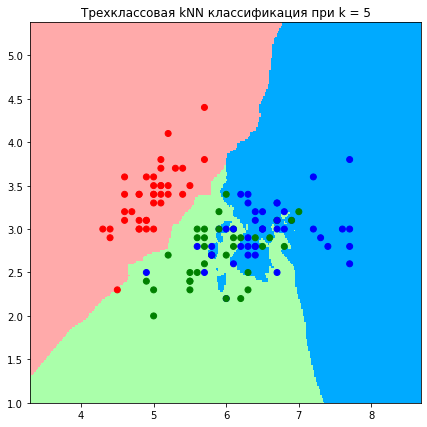

In [13]:
get_graph(X_train, y_train, 5, 0.9, 0.5)

Произведя некий аналог gridSearch получили оптимальные значения для k, q, w, они получились соответственно:

- k = 5;
- q = 0.9;
- w = 0.5.

Но на самом деле это всего лишь первое значение, которое имеет наивысшую метрику. И высокая точность системы зависит больше от коэффициента k именно для этого датасета.

Разделяющая гиперплоскость естественно очень похожа на первую, где q и w равны по 1. 